#TUGAS PEMROGRAMAN 3 : LEARNING
Almanik Balingga - 1301184253 - IF-42-10

##Connecting to GDrive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/tubes/AI

Mounted at /gdrive
/gdrive/My Drive/tubes/AI


##Import Library

In [2]:
import pandas as pd #import dong
import numpy as np #import dong lah
import matplotlib.pyplot as plt #import dong lah uhuy

##PREPROCESSING

###Load Dataframe

In [3]:
df = pd.read_csv('Diabetes.csv') #load data dong

In [4]:
df = df.iloc[:765,:] #ngebuang 3 baris terakhir karena kata Bapak Jondri tidak kelipatan 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape #udah 765 baris

(765, 9)

In [6]:
df.describe().T #liat dulu biaar seperti data scientist

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.0,3.850980,3.372784,0.000,1.000,3.000,6.000,17.00
Glucose,765.0,120.924183,32.018884,0.000,99.000,117.000,141.000,199.00
BloodPressure,765.0,69.112418,19.390663,0.000,62.000,72.000,80.000,122.00
SkinThickness,765.0,20.546405,15.961488,0.000,0.000,23.000,32.000,99.00
Insulin,765.0,79.966013,115.391838,0.000,0.000,32.000,128.000,846.00
BMI,765.0,32.004706,7.896328,0.000,27.300,32.000,36.600,67.10
DiabetesPedigreeFunction,765.0,0.472539,0.331798,0.078,0.243,0.375,0.627,2.42
Age,765.0,33.240523,11.766363,21.000,24.000,29.000,41.000,81.00
Outcome,765.0,0.349020,0.476972,0.000,0.000,0.000,1.000,1.00


Terdapat beberapa kolom data yang nilai minimumnya 0, utk pregnancies dan outcome masih masuk akal, karena kehamilan bisa bernilai 0, tapi utk BMI, Insulin, SkinThickness, BloodPressure, dan Glucose itu tidak wajar/tidak valid, sehingga dapat dilakukan perbaikan data.

Referensi : <br>
1. https://www.google.com/amp/s/www.diabetesselfmanagement.com/blog/do-you-know-your-insulin-level/amp/ <br>
2. https://www.diabetes.co.uk/diabetes_care/blood-sugar-level-ranges.html <br>
3. https://www.omnicalculator.com/health/bmi (di bagian rumus BMI) <br>
4. https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465 (dalam kasus ini, tekanan darah = 0 jika pasien dalam kondisi ekstrem. tetapi jika dilihat dari data, akan terlalu banyak kasus "langka" ini karena banyak yang bernilai 0) <br>
5. https://en.wikipedia.org/wiki/Human_skin <br>
6. https://towardsdatascience.com/model-selection-tuning-and-evaluation-in-k-nearest-neighbors-6d3024d78745



In [7]:
df = df.copy()
tmp = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] 
df[tmp] = df[tmp].replace(0,np.NaN)
print(df.isna().sum())

#kode ini akan mengisi angka 0 dengan NaN sehingga selanjutnya akan mudah untuk di isi dengan fillna

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               226
Insulin                     372
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

#mengisi missing value dengan rata rata dan nilai median

In [9]:
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.0,3.850980,3.372784,0.000,1.000,3.000000,6.000,17.00
Glucose,765.0,121.719737,30.477554,44.000,100.000,117.000000,141.000,199.00
BloodPressure,765.0,72.426027,12.111421,24.000,64.000,72.426027,80.000,122.00
SkinThickness,765.0,29.113725,8.805423,7.000,25.000,29.000000,32.000,99.00
Insulin,765.0,140.750327,86.542527,14.000,122.000,125.000000,128.000,846.00
BMI,765.0,32.469869,6.883986,18.200,27.500,32.350000,36.600,67.10
DiabetesPedigreeFunction,765.0,0.472539,0.331798,0.078,0.243,0.375000,0.627,2.42
Age,765.0,33.240523,11.766363,21.000,24.000,29.000000,41.000,81.00
Outcome,765.0,0.349020,0.476972,0.000,0.000,0.000000,1.000,1.00


###*'Float'ing* Everything

In [11]:
tmp = list(df['Outcome'])             # misahin kolom outcome (karna dia kelasnya jadi gausah di normalisasi)
df2 =df.iloc[:,:8].astype('float64')  #ngubah kolom selain kolom outcome jadi float
df2['Outcome'] = tmp                  #nambahin kolom outcome lagi ke data yg udah float 

In [12]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


###Normalisasi Data

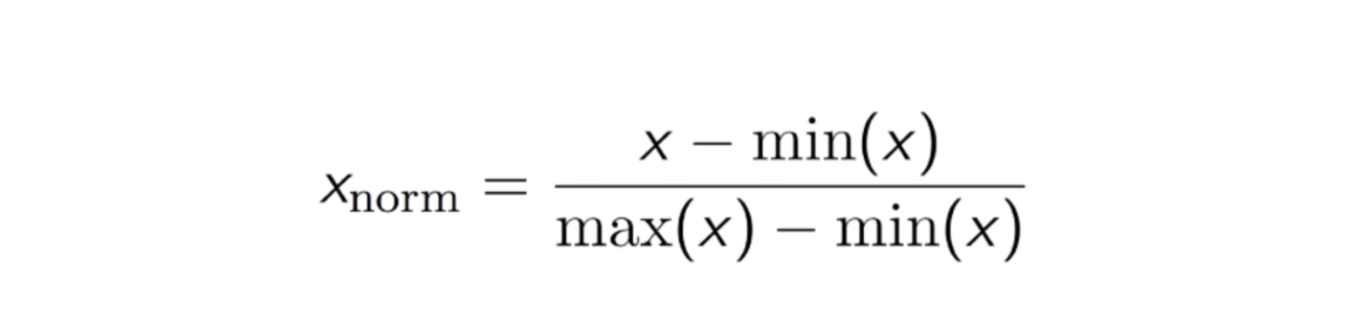

<br> Memakai scaling Normalisasi karena algoritma yang digunakan berbasis jarak

In [13]:
def normal(x):
  return (x-x.min()) / (x.max()-x.min())

In [14]:
col = list(df2.columns)                         #ambil daftar nama kolom yg ada
for i in range(len(col)-1):                     #perulangan sepanjang kolom -1 (karena kolom outcome ga di normalisasi)
  df2[[col[i]]] = df2[[col[i]]].apply(normal)   #proses perhitungan normalisasi

In [15]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


###Train - Test - Split
<br>
Fungsi ini nantinya akan memecah data mennjadi beberapa bagian sesuai nilai fold yang diterima. Dalam kasus ini akan dikembalikan(return) dalam bentuk :


```
hasil = [[dtrain1,dtest1],[dtrain2,dtest2],..[dtrainN,dtestN]]
```
Fungsi ini dalam membagi data akan menggunakan stratify = kelas. Yaitu misalkan di dalam dataframe terdapat kelas 1 = 25% data, dan kelas 2= 75% data. Maka dalam tiap split juga akan terbagi menjadi 25% data kelas 1 dan 75% data kelas 2


####FUNGSI INI YANG DIPILIH KARENA MENGHASILKAN DATASET YANG LEBIH BAGUS UNTUK TRAINING


In [16]:
def traintestsplit2(dataframe,fold):
  kls1 = dataframe[dataframe.Outcome == 1]    # ambil data yg kelas nya 1
  kls2 = dataframe[dataframe.Outcome == 0]    # ambil data yg kelas nya 0
  k_fold_dataset=[]                           # siapin  list buat nampung hasil split
  testpercentage= 1/fold                      # membuat persentase datatest (dalam hal ini nanti akan jadi 20%)
  x = 0                                       # inisiasi variable untuk perpindahan iloc[x:blabla] utk datatest
  y = int(testpercentage*len(kls1.index))     # inisaisi variable untuk perpindahan iloc [blabla:y] utk datatest
  y3 = y                                      # inisiasi variable untuk agar batas atas berubah
                                        
  y4 = int(testpercentage*len(kls2.index))    # agar batas atas berubah
  y1 = len(kls2.index)                        # inisiasi variable untuk perpindahan iloc[blabla:y1] utk datatrain            
  x1 = len(kls2.index) - y4                   # inisiasi variable untuk perpindahan iloc[x1:blabla] utk datatrain
  for i in range(fold):                       # looping sebanyak berapa lipatan
    testdata1 = kls1.iloc[x:y]                # tetsdata1 menyimpan 20% data yang memiliki kelas = 1 (dari 297 data dalam kasus ini)
    traindata1 = kls1.drop(testdata1.index)   # traindata1 menyimpan 80% daat yang memiliki kelas = 1 (dari 297 data dalam kasus ini)
    
    x = y                                     
    y = y+y3                                  # jadi dua variable diatas untuk yg awalnya iloc[0,53(20% data)] menjadi .iloc[53:106] (untuk lipatan selanjutnya)
    testdata2 = kls2.iloc[x1:y1]              #sama seperti beberapa baris kode diatas cuma bedanya ini untuk yg kelasnay = 0
    traindata2 = kls2.drop(testdata2.index)
    y1 = x1
    x1 = y1-y4
    

    k_fold_dataset.append([traindata1.append(traindata2, ignore_index=True),testdata1.append(testdata2, ignore_index=True)]) #dimasukkan dalam list
  return k_fold_dataset

In [18]:
#TIDAK DIGUNAKAN

def traintestsplit(dataframe,fold):
  kls1 = dataframe[dataframe.Outcome == 1]    # ambil data yg kelas nya 1
  kls2 = dataframe[dataframe.Outcome == 0]    # ambil data yg kelas nya 0
  k_fold_dataset=[]                           # siapin  list buat nampung hasil split
  testpercentage= 1/fold                      # membuat persentase datatest (dalam hal ini nanti akan jadi 20%)
  x = 0                                       # inisiasi variable untuk perpindahan iloc[x:blabla] utk datatest
  y = int(testpercentage*len(kls1.index))     # inisaisi variable untuk perpindahan iloc [blabla:y] utk datatest
  y3 = y                                      # inisiasi variable untuk agar batas atas berubah
  x1 = 0                                      # inisiasi variable untuk perpindahan iloc[x1:blabla] utk datatrain
  y1 = int(testpercentage*len(kls2.index))    # inisiasi variable untuk perpindahan iloc[blabla:y1] utk datatrain
  y4 = y1                                     # agar batas atas berubah
  for i in range(fold):                       # looping sebanyak berapa lipatan
    testdata1 = kls1.iloc[x:y]                # tetsdata1 menyimpan 20% data yang memiliki kelas = 1 (dari 297 data dalam kasus ini)
    traindata1 = kls1.drop(testdata1.index)   # traindata1 menyimpan 80% daat yang memiliki kelas = 1 (dari 297 data dalam kasus ini)
    
    x = y                                     
    y = y+y3                                  # jadi dua variable diatas untuk yg awalnya iloc[0,53(20% data)] menjadi .iloc[53:106] (untuk lipatan selanjutnya)
    testdata2 = kls2.iloc[x1:y1]              #sama seperti beberapa baris kode diatas cuma bedanya ini untuk yg kelasnay = 0
    traindata2 = kls2.drop(testdata2.index)
    
    x1 = y1
    y1 = y1+y4

    k_fold_dataset.append([traindata1.append(traindata2, ignore_index=True),testdata1.append(testdata2, ignore_index=True)]) #dimasukkan dalam list
  return k_fold_dataset

##Fungsi Fungsi KNN

###Menghitung Jarak

In [17]:
def hitungjarak(kiri,kanan):  

  #manhattan
  # sum = 0                           #untuk menyimpan hasil penjumlahan
  # for i in range(len(kiri)):        #bakal diulang sepanjang jumlah kolom (ada 8 karena kolom Outcome ndak di hitung buat jarak)
  #   sum = sum + abs(kiri[i]-kanan[i]) #penghitungan
  # return sum                        #inilaih nilai jaraknya


  #euclidean
  sum = 0 #untuk menyimpan hasil penjumlahan
  for i in range(len(kiri)): #bakal diulang sepanjang jumlah kolom (ada 8 karena kolom Outcome ndak di hitung buat jarak)
    sum = sum + (kiri[i]-kanan[i])**2 #penghitungan
  return np.sqrt(sum) #inilaih nilai jaraknya

In [18]:
def jarak(dfnya, trainnya,testpoint):
  jaraknya = []                             #buat nampung jarak
  for i in range(len(list(dfnya['Age']))):  #bakal iterasi sebanyak baris data train
      p1 = testpoint                        #1 barisdata test 
      p2 = list(dfnya.iloc[i])              #1 baris data train 
      jaraknya.append([trainnya[i],hitungjarak(p1,p2)]) #menghitung jarak
  return jaraknya                           #menghasilkan sebuah list berisi daftar jarak tiap baris datatrain

###Mencari kelas dari data test


In [19]:
def neighbor(dtrain,dtest,k):
  kelastrain = list(dtrain['Outcome'])            # simpan kelas training
  kelastest = list(dtest['Outcome'])              # simpan kelas test
  d_test = dtest.copy()                           #buat copy-an data biar data asli ga keubah
  d_train = dtrain.copy()                         #buat copy-an data biar data asli ga keubah
  d_test = d_test.drop('Outcome', axis= 1)        #drop kelas suapaya bisa itung jarak
  d_train = d_train.drop('Outcome', axis= 1)      #drop kelas suapaya bisa itung jarak
  
  kelaspredict = []                               # buat variabel untuk simpen final kelas data test
  akurasiCounter = []                             # buat variabel nilai akurasi

  for i in range(len(d_test['Age'])):             #membuat perulangan sejumlah baris data test
    
    temp = jarak(d_train,kelastrain,list(d_test.iloc[i])) #menghitung jarak
    temp = sorted(temp, key=lambda x: x[1], reverse=False) #mengurutkan list temp berdasarkan jarak terdekat
    ambil_k_tetangga =[]                          #deklarasi list untuk menyimpan k tetangga     
    
    for j in range(k):                            #melakukan perulangan sebanyak k kali untuk menyimpan kelas yang diprediksi
      ambil_k_tetangga.append(temp[j][0])         #menyimpan kelas k baris teratas (jarak paling dekat)
    
    if (ambil_k_tetangga.count(0) > (k // 2)):    # JIKA kelas yang bernilai 0 lebih banyak dari kelas bernilai 1 maka prediksi dianggap 0
      kelaspredict.append(0)
    else:                                         # JIKA kelas yang bernilai 1 lebih banyak dari kelas bernilai 0 maka prediksi dianggap 1
      kelaspredict.append(1)
    
    if (kelastest[i] == kelaspredict[i]):         # jika kelas prediksi sama dengan kelas asli data test maka akan list akurasiCounter akan diisi 1
      akurasiCounter.append(1)
    else:                                         # jika kelas prediksi tidak sama dengan kelas asli data test maka akan list akurasiCounter akan diisi 0
      akurasiCounter.append(0)
  
  akurasi = akurasiCounter.count(1)/len(kelastest)  # jumlah angka satu akan di bagi dengan panjang data test sehingga didapat nilai akurasi prediksi
  
  benarsalah = [kelaspredict.count(1),kelaspredict.count(0)] #return array berisi [jmlBenar,jmlSalah]
  
  return akurasi, benarsalah                      #di return

##Mencari *k* terbaik

###CARI K OPTIMUM
Dalam hal ini menggunakan fungsi test-split kedua (traintestsplit2), dan menggunakan penghitungan jarak eulidean distance

In [20]:
# test split 2, euclid

kfold = 5                             # k-fold valuenya
dfff = traintestsplit2(df2,kfold)     # split data 
dataknya =[]                          # menyimpan rata rata akurasi untuk tiap k
xaxis = np.arange(1,101,2)             # x axis untuk plotting
for i in range(1,101,2):               
  avgacc = 0                          # penghitung akurasi rata rata tiap k
  for j in range(kfold):              # perulangan untuk tiap fold data
    trainyok = dfff[j][0]
    testnyok = dfff[j][1]
    acc, trufals = neighbor(trainyok,testnyok,i)  # menghitung akurasi
    print("akurasi kfold ke-",j+1," = ",acc)      # print akurasi tiap fold
    avgacc = avgacc+acc                           # menghitung avg akurasi  
  print("rerata akurasi untuk k = ",i," adalah= ",avgacc/kfold) # print rata rata akurasi 
  dataknya.append(avgacc/kfold)       # rata rata akurasi utk plotting

akurasi kfold ke- 1  =  0.6776315789473685
akurasi kfold ke- 2  =  0.6578947368421053
akurasi kfold ke- 3  =  0.6842105263157895
akurasi kfold ke- 4  =  0.6973684210526315
akurasi kfold ke- 5  =  0.7171052631578947
rerata akurasi untuk k =  1  adalah=  0.6868421052631579
akurasi kfold ke- 1  =  0.6907894736842105
akurasi kfold ke- 2  =  0.743421052631579
akurasi kfold ke- 3  =  0.7105263157894737
akurasi kfold ke- 4  =  0.7302631578947368
akurasi kfold ke- 5  =  0.756578947368421
rerata akurasi untuk k =  3  adalah=  0.726315789473684
akurasi kfold ke- 1  =  0.7171052631578947
akurasi kfold ke- 2  =  0.8026315789473685
akurasi kfold ke- 3  =  0.6842105263157895
akurasi kfold ke- 4  =  0.756578947368421
akurasi kfold ke- 5  =  0.7368421052631579
rerata akurasi untuk k =  5  adalah=  0.7394736842105263
akurasi kfold ke- 1  =  0.7171052631578947
akurasi kfold ke- 2  =  0.7763157894736842
akurasi kfold ke- 3  =  0.7105263157894737
akurasi kfold ke- 4  =  0.756578947368421
akurasi kfold ke-

###Plotting

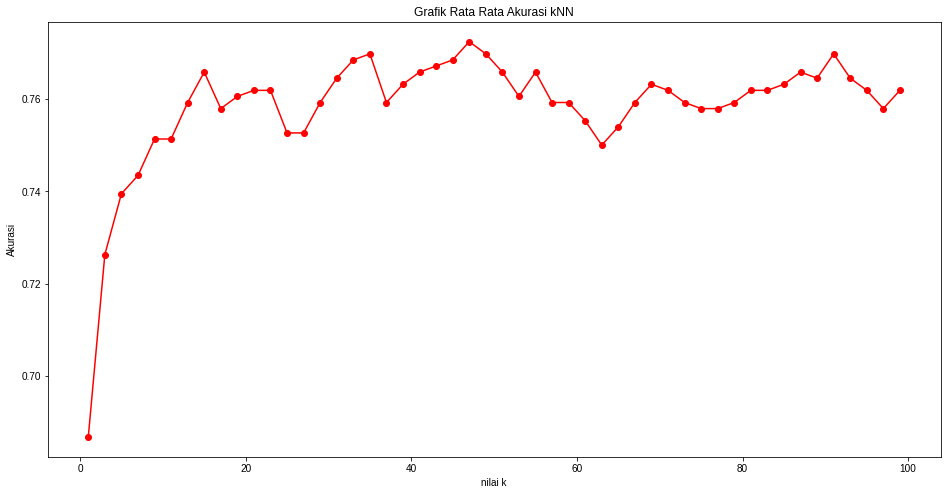


K dengan Akurasi Terbaik =  47
Dengan masing masing akurasi untuk tiap fold :
akurasi kfold ke- 1  =  0.7828947368421053
akurasi kfold ke- 2  =  0.7368421052631579
akurasi kfold ke- 3  =  0.7828947368421053
akurasi kfold ke- 4  =  0.7631578947368421
akurasi kfold ke- 5  =  0.7960526315789473
Dengan rata rata Akurasi =  0.7723684210526316


In [21]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Grafik Rata Rata Akurasi kNN')
ax.set_xlabel('nilai k')
ax.set_ylabel('Akurasi')
ax.plot(xaxis,dataknya, marker ='o', color = 'red')
plt.style.use('seaborn')
plt.show()
for i in range(len(dataknya)):
  if dataknya[i] == max(dataknya):
    print("")
    print("K dengan Akurasi Terbaik = ", xaxis[i])
    print("Dengan masing masing akurasi untuk tiap fold :")
    avgacc = 0
    for j in range(kfold):
      trainyok = dfff[j][0]
      testnyok = dfff[j][1]
      acc, trufals = neighbor(trainyok,testnyok,xaxis[i])
      print("akurasi kfold ke-",j+1," = ",acc)
      avgacc = avgacc+acc
    print("Dengan rata rata Akurasi = ", avgacc/kfold)
    break

###PERCOBAAN LAINNYA

akurasi kfold ke- 1  =  0.7039473684210527
akurasi kfold ke- 2  =  0.6842105263157895
akurasi kfold ke- 3  =  0.6842105263157895
akurasi kfold ke- 4  =  0.7368421052631579
akurasi kfold ke- 5  =  0.7039473684210527
rerata akurasi untuk k =  1  adalah=  0.7026315789473684
akurasi kfold ke- 1  =  0.756578947368421
akurasi kfold ke- 2  =  0.743421052631579
akurasi kfold ke- 3  =  0.6447368421052632
akurasi kfold ke- 4  =  0.743421052631579
akurasi kfold ke- 5  =  0.7039473684210527
rerata akurasi untuk k =  3  adalah=  0.7184210526315791
akurasi kfold ke- 1  =  0.75
akurasi kfold ke- 2  =  0.7631578947368421
akurasi kfold ke- 3  =  0.6973684210526315
akurasi kfold ke- 4  =  0.7631578947368421
akurasi kfold ke- 5  =  0.756578947368421
rerata akurasi untuk k =  5  adalah=  0.7460526315789473
akurasi kfold ke- 1  =  0.756578947368421
akurasi kfold ke- 2  =  0.75
akurasi kfold ke- 3  =  0.7368421052631579
akurasi kfold ke- 4  =  0.7697368421052632
akurasi kfold ke- 5  =  0.7302631578947368
re

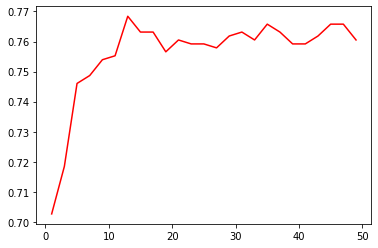

In [21]:
# test split, manhattan

kfold = 5
dfff = traintestsplit(df2,kfold)
dataknya =[]
xaxis = np.arange(1,51,2)
for i in range(1,51,2):
  avgacc = 0
  for j in range(kfold):
    trainyok = dfff[j][0]
    testnyok = dfff[j][1]
    acc, trufals = neighbor(trainyok,testnyok,i)
    print("akurasi kfold ke-",j+1," = ",acc)
    avgacc = avgacc+acc
  print("rerata akurasi untuk k = ",i," adalah= ",avgacc/kfold)
  dataknya.append(avgacc/kfold)
plt.plot(xaxis,dataknya, color = 'red')
plt.show()

akurasi kfold ke- 1  =  0.6973684210526315
akurasi kfold ke- 2  =  0.7171052631578947
akurasi kfold ke- 3  =  0.6973684210526315
akurasi kfold ke- 4  =  0.7105263157894737
akurasi kfold ke- 5  =  0.6644736842105263
rerata akurasi untuk k =  1  adalah=  0.6973684210526315
akurasi kfold ke- 1  =  0.7171052631578947
akurasi kfold ke- 2  =  0.743421052631579
akurasi kfold ke- 3  =  0.6447368421052632
akurasi kfold ke- 4  =  0.7631578947368421
akurasi kfold ke- 5  =  0.756578947368421
rerata akurasi untuk k =  3  adalah=  0.725
akurasi kfold ke- 1  =  0.7039473684210527
akurasi kfold ke- 2  =  0.756578947368421
akurasi kfold ke- 3  =  0.7105263157894737
akurasi kfold ke- 4  =  0.7368421052631579
akurasi kfold ke- 5  =  0.7631578947368421
rerata akurasi untuk k =  5  adalah=  0.7342105263157894
akurasi kfold ke- 1  =  0.7171052631578947
akurasi kfold ke- 2  =  0.7960526315789473
akurasi kfold ke- 3  =  0.7368421052631579
akurasi kfold ke- 4  =  0.756578947368421
akurasi kfold ke- 5  =  0.763

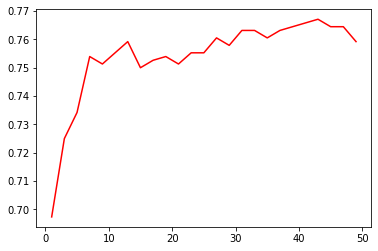

In [44]:
#test split 2, manhattan

kfold = 5
dfff = traintestsplit2(df2,kfold)
dataknya =[]
xaxis = np.arange(1,51,2)
for i in range(1,51,2):
  avgacc = 0
  for j in range(kfold):
    trainyok = dfff[j][0]
    testnyok = dfff[j][1]
    acc, trufals = neighbor(trainyok,testnyok,i)
    print("akurasi kfold ke-",j+1," = ",acc)
    avgacc = avgacc+acc
  print("rerata akurasi untuk k = ",i," adalah= ",avgacc/kfold)
  dataknya.append(avgacc/kfold)
plt.plot(xaxis,dataknya, color = 'red')
plt.show()